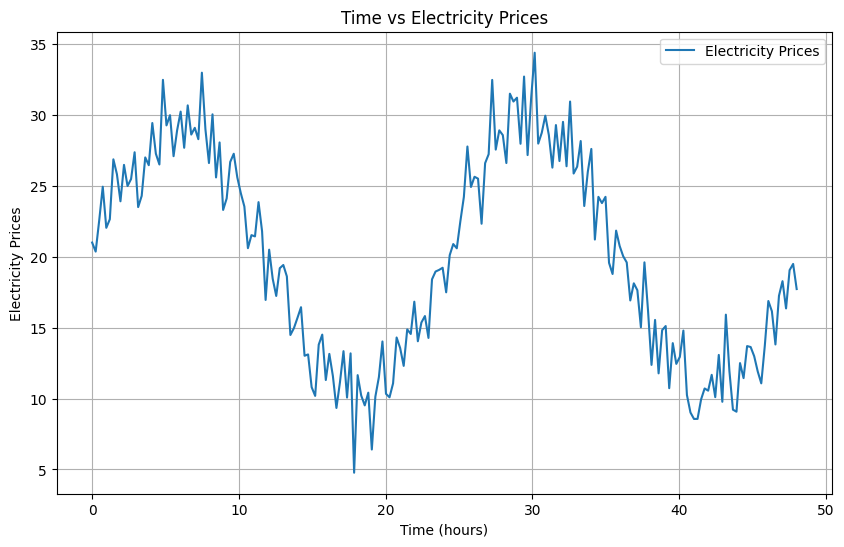

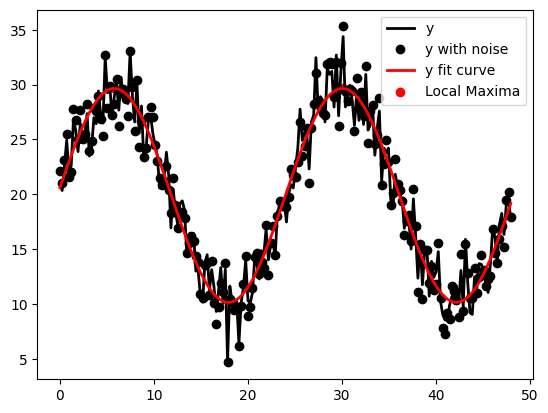

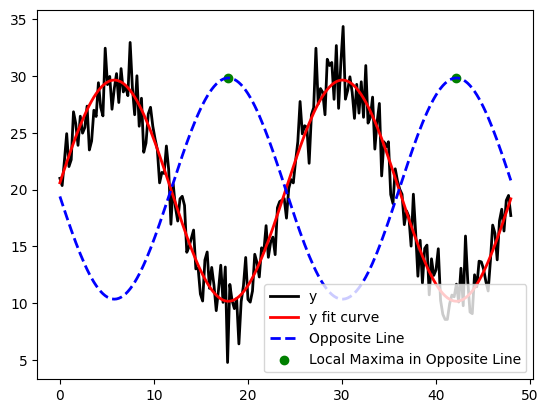

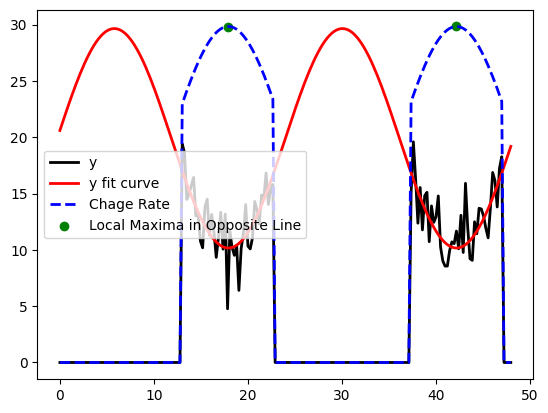

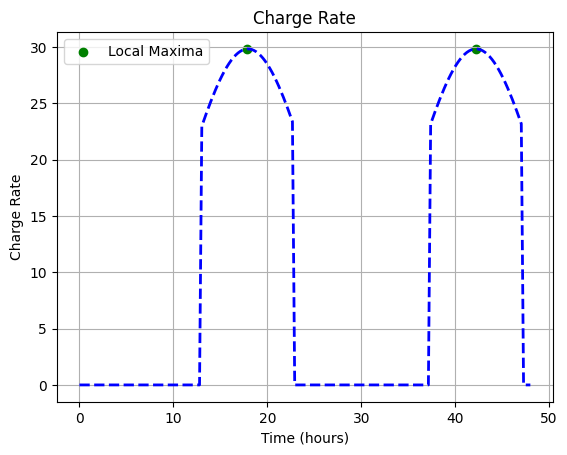

In [20]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
time = np.linspace(0, 48, 200)
base_prices = 20 + 10 * np.sin((2 * np.pi / 24) * time)
noise = np.random.normal(scale=2, size=len(time))
electricity_prices = base_prices + noise

plt.figure(figsize=(10, 6))
plt.plot(time, electricity_prices, label='Electricity Prices')
plt.title('Time vs Electricity Prices')
plt.xlabel('Time (hours)')
plt.ylabel('Electricity Prices')
plt.legend()
plt.grid(True)
plt.show()

import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}


N, amp, omega, phase, offset, noise = 500, 1., 2., .5, 4., 3
#N, amp, omega, phase, offset, noise = 50, 1., .4, .5, 4., .2
#N, amp, omega, phase, offset, noise = 200, 1., 20, .5, 4., 1
tt = time
tt2 = time
yy = electricity_prices
yynoise = yy + noise*(numpy.random.random(len(tt))-0.5)

res = fit_sin(tt, yynoise)

maxima_indices = argrelextrema(res["fitfunc"](tt), np.greater)

plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, yynoise, "ok", label="y with noise")
plt.plot(tt2, res["fitfunc"](tt2), "r-", label="y fit curve", linewidth=2)
plt.scatter(tt[maxima_indices], res["fitfunc"](tt)[maxima_indices], color='red', label='Local Maxima')
plt.legend(loc="best")
plt.show()


opposite_line = 40 - res["fitfunc"](tt)

# Find indices of local maxima in the opposite line
maxima_indices_opposite = argrelextrema(opposite_line, np.greater)

plt.plot(tt, yy, "-k", label="y", linewidth=2)
plt.plot(tt, res["fitfunc"](tt), "r-", label="y fit curve", linewidth=2)
plt.plot(tt, opposite_line, "b--", label="Opposite Line", linewidth=2)
plt.scatter(tt[maxima_indices_opposite], opposite_line[maxima_indices_opposite], color='green', label='Local Maxima in Opposite Line')
plt.legend(loc="best")
plt.show()


# Identify local maxima indices on the opposite line
maxima_indices_opposite = argrelextrema(opposite_line, np.greater)

# Create an array to store the intervals
intervals = np.zeros_like(opposite_line)

interval_width = 20 

# Set values inside the intervals to the original values
for max_index in maxima_indices_opposite[0]:
    start_index = max(0, max_index - interval_width)
    end_index = min(len(tt), max_index + interval_width + 1)
    intervals[start_index:end_index] = 1

# Plot the result
plt.plot(tt, yy * intervals, "-k", label="y", linewidth=2)
plt.plot(tt, res["fitfunc"](tt), "r-", label="y fit curve", linewidth=2)
plt.plot(tt, opposite_line * intervals, "b--", label="Chage Rate", linewidth=2)
plt.scatter(tt[maxima_indices_opposite], opposite_line[maxima_indices_opposite], color='green', label='Local Maxima in Opposite Line')
plt.legend(loc="best")
plt.show()


plt.plot(tt, opposite_line * intervals, "b--", linewidth=2)
plt.scatter(tt[maxima_indices_opposite], opposite_line[maxima_indices_opposite], color='green', label='Local Maxima')
plt.legend(loc="best")
plt.title('Charge Rate')
plt.xlabel('Time (hours)')
plt.ylabel('Charge Rate')
plt.grid(True)
plt.show()